<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

#### Information outputs

In [ ]:
for c in breast_cancer.columns:
    print(c)

In [ ]:
breast_cancer.info()

In [ ]:
breast_cancer.isnull().sum()

In [24]:
breast_cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### Fix dataframe: Remove last column; make `diagnosis` column binary

In [43]:
breast_cancer.drop(columns='Unnamed: 32', inplace=True)

In [44]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M': 1, 'B': 0})
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [45]:
breast_cancer.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
9013594,0,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.10540,0.3387,0.09638
853201,1,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,...,20.01,19.52,134.90,1227.0,0.1255,0.2812,0.2489,0.14560,0.2756,0.07919
9113156,0,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,...,15.40,31.98,100.40,734.6,0.1017,0.1460,0.1472,0.05563,0.2345,0.06464


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [96]:
target_col = "diagnosis"
y = breast_cancer[target_col]
X = breast_cancer[[col for col in breast_cancer.columns if col != target_col]]

print(X.sample(8))

         radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                              
86408         12.630         20.76           82.15      480.4   
9010333        8.878         15.49           56.74      241.0   
9112594       13.000         25.13           82.61      520.2   
902727        13.280         13.72           85.79      541.8   
894047         8.597         18.60           54.09      221.2   
9111843       12.000         28.23           76.77      442.5   
874217        18.310         18.58          118.60     1041.0   
903011        11.270         15.50           73.38      392.0   

         smoothness_mean  compactness_mean  concavity_mean  \
id                                                           
86408            0.09933           0.12090         0.10650   
9010333          0.08293           0.07698         0.04721   
9112594          0.08369           0.05073         0.01206   
902727           0.08363           0.08

In [65]:
for col in X.columns:
    print(col)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [60]:
# predict test class:
y_pred = model.predict(X_test)

# predicted test probability:
y_prob = model.predict_proba(X_test)


#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [71]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

import sklearn.metrics as metrics

In [72]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

array([[85,  3],
       [ 5, 50]], dtype=int64)

In [63]:
# ANSWER
confusion_df = pd.DataFrame(
    confusion,
    columns=['predicted_healthy', 'predicted_cancer'],
    index=['is_healthy', 'is_cancer']
)

confusion_df

,predicted_healthy,predicted_cancer
is_healthy,85,3
is_cancer,5,50


In [85]:
# cell values
tp = confusion_df.loc['is_cancer', 'predicted_cancer']
fp = confusion_df.loc['is_healthy', 'predicted_cancer']
tn = confusion_df.loc['is_healthy', 'predicted_healthy']
fn = confusion_df.loc['is_cancer', 'predicted_healthy']


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [1]:
# ANSWER
# use float to perform true division, not integer division
# TP = confusion_df.loc['is_healthy', 'predicted_healthy']
# FN = confusion_df.loc['']

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

NameError: name 'metrics' is not defined

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [76]:
# ANSWER
misclass_rate = 1 - accuracy
print(misclass_rate)

0.05594405594405594


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [80]:
# ANSWER
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
sensitivity

0.9090909090909091

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [86]:
# ANSWER
# specificity = tn / float(tn + fp)
specificity = tn / (tn + fp)
specificity

0.9659090909090909

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [89]:
# ANSWER
false_pos = 1 - specificity
# false_pos = fp / float(tn + fp)
false_pos

0.03409090909090906

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [92]:
# ANSWER
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
precision

0.9433962264150944

#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [98]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
# predicted test probability:
y_prob = model.predict_proba(X_test)



y_pp = pd.DataFrame(y_prob, columns=['class_0_pp','class_1_pp'], index = X_test.index )
y_pp

,class_0_pp,class_1_pp
id,,
906564,0.364720,0.635280
85715,0.308170,0.691830
891670,0.999000,0.001000
874217,0.006373,0.993627
905680,0.140248,0.859752
...,...,...
88203002,0.995539,0.004461
905557,0.217844,0.782156
91594602,0.076100,0.923900


⚠️ Note that we lost the index-- `predict_proba()` returns a numpy array, not a dataframe,
so you have to supply the original index from X_test to re-link it

#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [100]:
from sklearn.metrics import roc_curve, auc

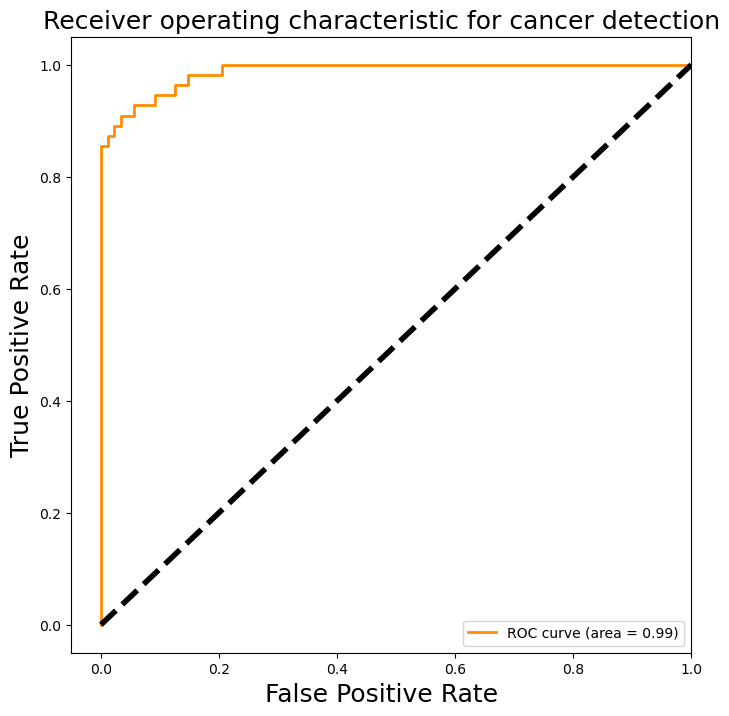

In [103]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = roc_curve(y_test, y_pp.class_1_pp, pos_label=1)

# Find auc
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



